In [4]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import nn, optim
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
from torch.utils.data.sampler import SubsetRandomSampler
# import helper

In [4]:
# data loading

In [5]:
## Step 1
!git clone https://github.com/YoongiKim/CIFAR-10-images

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 17.03 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Checking out files: 100% (60001/60001), done.


In [7]:
## Step 2
# Activate CUDA on Google Colab
import torch


train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [14]:
## Step 3
# Define data transformations to facilitate data augmentation and normalization
# E.g., flip, rotation, translation, to_tensor, normalize

from torchvision import transforms

train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), 
                                                          (0.5, 0.5, 0.5))
                                      ])

test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5),
                                                          (0.5, 0.5, 0.5)),
                                     ])

In [8]:
# import os
# p=[]
# c=[]
# for file_name in os.listdir("CIFAR-10-images/test/"):
#   for files in os.listdir("CIFAR-10-images/test/"+file_name):
#     if files.split(".")[-1].lower() in {"jpeg", "jpg", "png"}:
#         #img = cv2.imread("CIFAR-10-images/test/airplane/0000.jpg" + file_name)
#         #print('CIFAR-10-images/test/'+file_name+'/'+files, file_name)
#         #dataset.append([['CIFAR-10-images/test/'+file_name+'/'+files , file_name]])
#         path='CIFAR-10-images/test/'+file_name+'/'+files
#         clss=file_name
#         p.append(path)
#         c.append(clss)


# import pandas as pd
# test_data_set=pd.DataFrame({'path':p,'clss':c})
# test_data_set.to_csv("test_data_set.csv",index=False)

In [9]:
#test_data_set.head()

In [10]:
#list(set(test_data_set.clss))

In [11]:
# for i in set(test_data_set.clss):


#   print(sum(test_data_set.clss==i))
                   

In [12]:
# import os
# p=[]
# c=[]
# for file_name in os.listdir("CIFAR-10-images/train/"):
#   for files in os.listdir("CIFAR-10-images/train/"+file_name):
#     if files.split(".")[-1].lower() in {"jpeg", "jpg", "png"}:
#         path='CIFAR-10-images/train/'+file_name+'/'+files
#         clss=file_name
#         p.append(path)
#         c.append(clss)


# import pandas as pd
# train_data_set=pd.DataFrame({'path':p,'clss':c})
# train_data_set.to_csv("train_data_set",index=False)

In [13]:
# train_data_set

In [14]:
# pd.read_csv("/content/test_data_set")

In [15]:
# class MyDataset():
#   def __init__(self,image_set,argument=True):
#     with open(image_set,"r") as csv_handle:
#       csv_reader = csv.reader(csv_handle,delimiter=",")
#       self.imgfiles=[eachline[0] for eachline in csv_reader]
#     self.argument=argument
#   def __len__(self):
#     return len(self.imgfiles)
#   def __gititem__(self,idx):
#     img=imageio.imread(self.imgfiles[idx])
#     X=np.asarray(img,dtype=np.float32)
#     if self.argument:
#       X=do_yarn_transform(X)
#     Y=self.classlabels[idx]
#     return X,Y

In [16]:
# def do_your_transform(X):
#   class MyDataset(Dataset):
#     def __init__(self,image_set,augment=True):
#       with open(image_set,"r") as csv.handle:
#         csv_reader= csv.reader(csv_handle,delimiter=',')
#         self.imgfiles=[eachline[0] for eachline in csv_reader]

#       with open(image_set,'r') as csv_handle:
#         csv_reader=csv.reader(csv_handle,delimiter=',')
#         self.classlabels=[int(eachline[1]) for eachline in csv_reader]

#       self.augment=augment

#     def __len__(self):
#       return len(selg.imgfiles)

#     def __getitem__(self,idx):
#       img = imageio.imread(self.imgfiles[idx])
#       X=np.asarray(img,dtype=np.float32)

#       if self.augment:
#         X=do_your_transform(X)
#       Y=self.classlabels[idx]
#       return X,Y

In [17]:
# # trainloader = torch.utils.data.DataLoader(train_data_set, batch_size=32)
# testloader = torch.utils.data.DataLoader("/content/test_data_set.csv", batch_size=6)
# iter(testloader).next()

In [18]:
import os

test_path = '/content/CIFAR-10-images/test'    
lst=list(os.listdir(test_path))
lst.index("horse")

0

In [19]:
for class_fldr_name in os.listdir(test_path):
  print(class_fldr_name)

horse
automobile
bird
airplane
frog
truck
dog
deer
cat
ship


In [20]:
## Step 4
# Write your custom data loader. Define train, validation and test dataloader

from imutils import paths
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import pandas as pd

 
# test_paths = list(paths.list_images(test_path))   # generator function which return the list_files
#test_data = pd.DataFrame(columns=['image_path', 'label']) # creating an empty dataframe of two columns out of which one will
#                               # contain the full path of the test images and other will contain the corresponding class name
# test_labels = []                      # craeting an ampty list to store the corresponding labels of the images



test_path = '/content/CIFAR-10-images/test'       # path of the folder where all the class_folder are present
test_labels = []
test_paths=[]
List1=list(os.listdir(test_path))
for class_fldr_name in List1:
  for file_name in os.listdir(test_path+"/"+class_fldr_name):
    test_paths.append(test_path+"/"+class_fldr_name+'/'+file_name)
    test_labels.append(List1.index(class_fldr_name)+1)                      # this loop just enlist the paths in the list named test_paths and 
                                                      #the corresponding classes or encoded labels in the list test_labels


test_data=pd.DataFrame({'image_path':test_paths,'label':test_labels})
test_data = test_data.sample(frac=1).reset_index(drop=True) #shuffle the dataset
test_data.to_csv(test_path+'/'+'data.csv', index=False)


# for i, image_path in enumerate(test_paths):
#     test_data.loc[i, 'image_path'] = image_path
#     test_label = image_path[len(test_path):].split('/')[1]
#     test_labels.append(test_label)                # this loop just enlist the classes in the list test_labels

#test_labels = np.array(test_labels)
# one-hot encoding
#labels = LabelBinarizer().fit_transform(test_labels)

# for i in range(len(labels)):
#     idx = np.argmax(labels[i])
#     test_data.loc[i,"label"] = idx



train_path = '/content/CIFAR-10-images/train'       # path of the folder where all the class_folder are present
train_labels = []
train_paths=[]
List2=list(os.listdir(train_path))
for class_fldr_name in List2:
  for file_name in os.listdir(train_path+"/"+class_fldr_name):
    train_paths.append(train_path+"/"+class_fldr_name+'/'+file_name)
    train_labels.append(List2.index(class_fldr_name)+1)                      # this loop just enlist the paths in the list named test_paths and 
                                                      #the corresponding classes or encoded labels in the list test_labels

train_data=pd.DataFrame({'image_path':train_paths,'label':train_labels})
train_data = train_data.sample(frac=1).reset_index(drop=True) #shuffle the dataset
train_data.to_csv(train_path+'/'+'data.csv', index=False)




In [21]:
test_data.head()

,image_path,label
0,/content/CIFAR-10-images/test/horse/0531.jpg,1
1,/content/CIFAR-10-images/test/frog/0891.jpg,5
2,/content/CIFAR-10-images/test/truck/0592.jpg,6
3,/content/CIFAR-10-images/test/airplane/0239.jpg,4
4,/content/CIFAR-10-images/test/ship/0939.jpg,10


In [22]:
train_data.head()

,image_path,label
0,/content/CIFAR-10-images/train/airplane/4326.jpg,4
1,/content/CIFAR-10-images/train/ship/0967.jpg,10
2,/content/CIFAR-10-images/train/bird/4314.jpg,3
3,/content/CIFAR-10-images/train/truck/0686.jpg,6
4,/content/CIFAR-10-images/train/cat/2783.jpg,9


In [23]:
test_paths[0:5]

['/content/CIFAR-10-images/test/horse/0613.jpg',
 '/content/CIFAR-10-images/test/horse/0478.jpg',
 '/content/CIFAR-10-images/test/horse/0220.jpg',
 '/content/CIFAR-10-images/test/horse/0499.jpg',
 '/content/CIFAR-10-images/test/horse/0778.jpg']

In [24]:
pd.read_csv("/content/CIFAR-10-images/train/data.csv").head()

,image_path,label
0,/content/CIFAR-10-images/train/airplane/4326.jpg,4
1,/content/CIFAR-10-images/train/ship/0967.jpg,10
2,/content/CIFAR-10-images/train/bird/4314.jpg,3
3,/content/CIFAR-10-images/train/truck/0686.jpg,6
4,/content/CIFAR-10-images/train/cat/2783.jpg,9


In [15]:
# creating dataset module
from torch.utils.data import Dataset

class CIFAR10(Dataset):
    def __init__(self, csv_file, transform=None):
        self.df = pd.read_csv(csv_file)
        self.X = self.df.image_path.values
        self.y = self.df.label.values
        self.transform = transform

    def __len__(self):
        return (len(self.X))

    def __getitem__(self, idx):
        image = Image.open(self.X[idx])
        image = self.transform(image)
        label = self.y[idx]

        return image, label

In [16]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader


valid = 0.2
batch_size = 32

test_path = '/content/CIFAR-10-images/test' 
train_path = '/content/CIFAR-10-images/train'

train_data = CIFAR10(train_path+'/'+'data.csv', transform = train_transform)
test_data = CIFAR10(test_path+'/'+'data.csv', transform = train_transform)

num_train = len(train_data)
indices = list(range(num_train))
split = int(valid * num_train)
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
valid_loader = DataLoader(train_data, sampler=valid_sampler, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle = True)

# classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [27]:
########################################### Step 5 (OPTIONAL)
# Visualize a batch of train (2 x n_class) and test data (2 x n_classes)


In [28]:

# # import matplotlib.pyplot as plt
# # import numpy as np
# # from torch import nn, optim
# # from torch.autograd import Variable

# def imshow(image, ax=None, title=None, normalize=True):
#     """Imshow for Tensor."""
#     if ax is None:
#         fig, ax = plt.subplots()
#     image = image.numpy().transpose((1, 2, 0))

#     if normalize:
#         mean = np.array([0.485, 0.456, 0.406])
#         std = np.array([0.229, 0.224, 0.225])
#         image = std * image + mean
#         image = np.clip(image, 0, 1)

#     ax.imshow(image)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.tick_params(axis='both', length=0)
#     ax.set_xticklabels('')
#     ax.set_yticklabels('')

#     return ax



# from PIL import Image
# data_iter = iter(train_loader)
# import matplotlib.pyplot as plt
# import helper

# images, labels = next(data_iter)
# import torch
# for idx in np.arange(batch_size):
#     ax1 = fig1.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
#     #ax1.title.set_text('Test data')
#     imshow(images[idx])
#     ax1.set_title(classes[labels[idx]])
# # fig, axes = plt.subplots(figsize=(10,4), ncols=32)
# # for ii in range(batch_size):
# #     ax = axes[ii]
# #     imshow(images[ii], ax=ax, normalize=False)

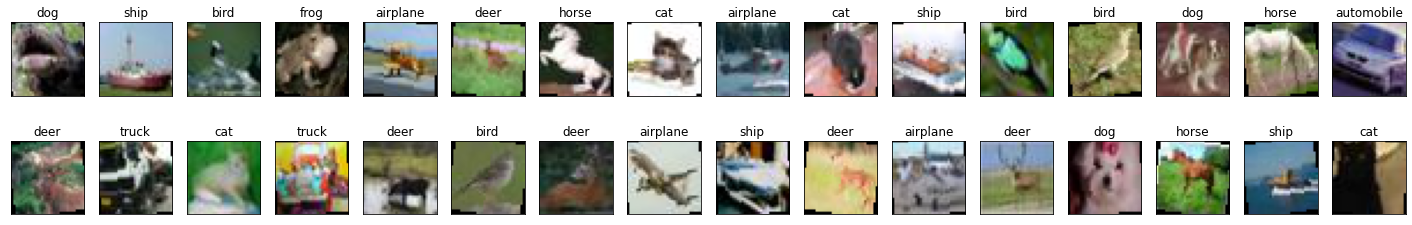

In [29]:
## Step 5 (OPTIONAL)
# Visualize a batch of train (2 x n_class) and test data (2 x n_classes)
from PIL import Image
import matplotlib.pyplot as plt

## visualization of 32 train images
images, labels = next(iter(train_loader))
images = images.numpy()

fig = plt.figure(figsize=(25,4))

def imshow(img):
  img = img/ 2 + 0.5
  plt.imshow(np.transpose(img, (1,2,0)))

for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(List2[labels[idx]-1])

# images,labels = next(iter(test_loader))
# images = images.numpy()

# fig1 = plt.figure(figsize=(25,4))

# def imshow(img):
#   img = img/ 2 + 0.5
#   plt.imshow(np.transpose(img, (1,2,0)))

# for idx in np.arange(batch_size):
#     ax1 = fig1.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
#     #ax1.title.set_text('Test data')
#     imshow(images[idx])
#     # ax1.set_title(classes[labels[idx]])
#     ax1.set_title(List2[labels[idx])
#     # List2[labels[idx]

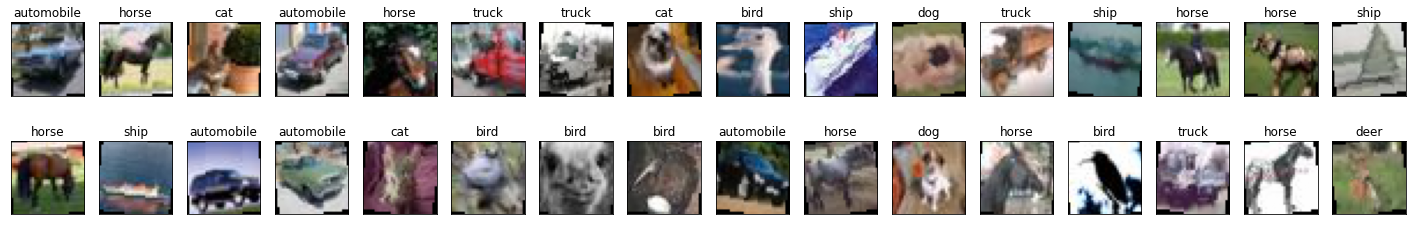

In [30]:
## visualization of 32 test images

images, labels = next(iter(test_loader))
images = images.numpy()

fig = plt.figure(figsize=(25,4))

def imshow(img):
  img = img/ 2 + 0.5
  plt.imshow(np.transpose(img, (1,2,0)))

for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(List1[labels[idx]-1])

In [1]:
# ## Step 6
# # model = CNN(n_hidden_layers, n_output)

# class CNN(nn.Module):
#   def __init__(self):
#     super(CNN, self).__init__()
#     self.conv1 = nn.Conv2d(3,32,3, padding=1)
#     self.conv2 = nn.Conv2d(32,64,3, padding=1)
#     self.conv3 = nn.Conv2d(64,128,3, padding=1)
#     self.conv4 = nn.Conv2d(128,128,3, padding=1)
#     self.conv5 = nn.Conv2d(128,256,3, padding=1)
#     self.conv6 = nn.Conv2d(256,256,3, padding=1)
#     self.pool =  nn.MaxPool2d(2,2)
#     self.relu = nn.ReLU(inplace=True)
#     self.fc1 = nn.Linear(4096,1024)
#     self.fc2 = nn.Linear(1024,512)
#     self.fc3 = nn.Linear(512,10)
#     self.dropout1 = nn.Dropout(0.2)
#     self.dropout2 = nn.Dropout(0.1)
#     self.batchnorm1 = nn.BatchNorm2d(32)
#     self.batchnorm2 = nn.BatchNorm2d(128)
#     self.batchnorm3 = nn.BatchNorm2d(256)

#   def forward(self, x):
#     x = self.conv1(x)
#     x = self.batchnorm1(x)
#     x = self.relu(x)
#     x = self.conv2(x)
#     x = self.relu(x)
#     x = self.pool(x)
    
#     x = self.conv3(x)
#     x = self.batchnorm2(x)
#     x = self.relu(x)
#     x = self.conv4(x)
#     x = self.relu(x)
#     x = self.pool(x)
#     x = self.dropout1(x)    

#     x = self.conv5(x)
#     x = self.batchnorm3(x)
#     x = self.relu(x)
#     x = self.conv6(x)
#     x = self.relu(x)
#     x = self.pool(x)
    
#     x = x.view(x.size(0), -1)
#     x = self.dropout1(x)
#     x = self.relu(self.fc1(x))
#     x = self.dropout2(x)
#     x = self.relu(self.fc2(x))
#     x = self.fc3(x)
#     return x


In [2]:
# import torch.nn as nn

# # define the CNN architecture
# class CNN(nn.Module):
#   def __init__(self):
#     super(CNN, self).__init__()
#     # convolutional layer (sees 32x32x3 image tensor)
#     self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
#     # convolutional layer (sees 16x16x16 tensor)
#     self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
#     # convolutional layer (sees 8x8x32 tensor)
#     self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
#     # max pooling layer
#     self.pool = nn.MaxPool2d(2, 2)
#     # linear layer (64 * 4 * 4 -> 500)
#     self.fc1 = nn.Linear(64 * 4 * 4, 500)
#     # linear layer (500 -> 10)
#     self.fc2 = nn.Linear(500, 10)
#     # dropout layer (p=0.25)
#     self.dropout = nn.Dropout(0.25)

#   def forward(self, x):
#     # add sequence of convolutional and max pooling layers
#     x = self.pool(F.relu(self.conv1(x)))
#     x = self.pool(F.relu(self.conv2(x)))
#     x = self.pool(F.relu(self.conv3(x)))
#     # flatten image input
#     x = x.view(-1, 64 * 4 * 4)
#     # add dropout layer
#     x = self.dropout(x)
#     # add 1st hidden layer, with relu activation function
#     x = F.relu(self.fc1(x))
#     # add dropout layer
#     x = self.dropout(x)
#     # add 2nd hidden layer, with relu activation function
#     x = self.fc2(x)
#     return x

# # create a complete CNN
# model = CNN()
# print(model)

# # move tensors to GPU if CUDA is available
# if train_on_gpu:
#     model.cuda()

In [8]:
# ## Step 6

import torch.nn as nn

# define the CNN architecture
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
    self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
    self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(64 * 4 * 4, 500)
    self.fc2 = nn.Linear(500, 10)
    self.dropout = nn.Dropout(0.25)

  def forward(self, x):
    x=x.cuda()
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1, 64 * 4 * 4)
    x = self.dropout(x)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x

# create a complete CNN
model = CNN()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [ ]:
model.cuda()

In [17]:
len(train_loader)

1250

In [18]:
test_images, test_labels = next(iter(test_loader))
print(test_images[1].shape)
train_images, train_labels = next(iter(train_loader))
print(train_images[1].shape)
valid_images, train_labels = next(iter(valid_loader))
print(valid_images[1].shape)

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


In [19]:
i=0
for images, labels in train_loader:
  i+=1
  if i%500==0:
    # images=images.cuda()
    print(images.shape,labels)

torch.Size([32, 3, 32, 32]) tensor([ 4,  8,  4,  7,  7,  1,  2,  4,  2,  5, 10,  9,  2,  6,  8,  8,  7,  7,
         9,  9,  4,  5,  5,  3,  1,  1,  1,  3,  2,  5,  1,  8])
torch.Size([32, 3, 32, 32]) tensor([10,  1,  1,  8,  3,  5,  8,  3,  1, 10,  1,  4, 10,  1,  8,  1,  1, 10,
         7,  3, 10,  3, 10,  7,  3,  6,  1,  3,  8,  8, 10,  1])


In [20]:
## Step 7
# Define loss and solver
# criterion = ...
# optimizer = ...

from torch import optim


model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

# if train_on_gpu:
#     model.cuda()

In [ ]:
# ## Step 8
# # train_with_validation
# # train(n_epoch, model_filename, criterion, optimizer)

# def train(epoch, model_name, criterion, optimizer, trainldr, validldr):
#   valid_loss_min = np.Inf

#   for e in range(epoch):
#     train_loss = 0
#     valid_loss = 0

#     model.train()
#     for images, labels in trainldr:
#       images, labels = images.cuda(), labels.cuda()
#       log_probs = model(images)
#       loss = criterion(log_probs, labels)
#       optimizer.zero_grad()
#       loss.backward()
#       optimizer.step()
#       train_loss += loss.item()*len(images)
#     else:
#       model.eval()
#       with torch.no_grad():
#         for images, labels in validldr:
#           images, labels = images.cuda(), labels.cuda()
#           log_probs = model(images)
#           loss = criterion(log_probs, labels)
#           valid_loss += loss.item()*len(images)

#     train_loss = train_loss/len(trainldr.sampler)
#     valid_loss = valid_loss/len(validldr.sampler)

#     print("epoch: {}/{}".format(e+1, epoch),
#           "train_loss: {:.4f}".format(train_loss),
#           "valid_loss: {:.4f}".format(valid_loss))
    
#     if valid_loss <= valid_loss_min:
#       path = F"/content/{model_name}"
#       torch.save(model.state_dict(), path)
#       valid_loss_min = valid_loss


# epoch = 30
# model_name = "cifar10_cnn"
# train(epoch, model_name, criterion, optimizer, train_loader, valid_loader)

In [21]:
# train the model
import torch.nn.functional as F

n_epochs = 10

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

  # keep track of training and validation loss
  train_loss = 0.0
  valid_loss = 0.0
  
  ###################
  # train the model #
  ###################
  model.train()
  for data, target in train_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
      data, target = data.cuda(), target.cuda()

    #   data, target = data.cuda(), target.cuda()
    # clear the gradients of all optimized variables
    optimizer.zero_grad()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()
    # perform a single optimization step (parameter update)
    optimizer.step()
    # update training loss
    train_loss += loss.item()*len(images)
    
  ######################    
  # validate the model #
  ######################
  model.eval()
  for data, target in valid_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:

      data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # output=output.cuda()
    # calculate the batch loss
    loss = criterion(output, target.cuda())
    # update average validation loss 
    valid_loss += loss.item()*len(images)

  # calculate average losses
  train_loss = train_loss/len(train_loader.sampler)
  valid_loss = valid_loss/len(valid_loader.sampler)
      
  # print training/validation statistics 
  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
      epoch, train_loss, valid_loss))
  
  # save model if validation loss has decreased
  if valid_loss <= valid_loss_min:
    print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
    valid_loss_min,
    valid_loss))
    path = F"/content/model_cifar.pt"
    torch.save(model.state_dict(),path)
    valid_loss_min = valid_loss


RuntimeError: ignored

In [ ]:
## Step 9
# Evaluation with inference: load model
# performance = test(model_filename) # total accuracy

def test(model_name):
  path = F"/content/{model_name}"
  model.load_state_dict(torch.load(path))

  test_loss = 0
  test_accuracy = 0
  
  model.eval()
  for images, labels in test_loader:
    images, labels = images.cuda(), labels.cuda()
    output = model(images)
    loss = criterion(output, labels)
    test_loss += loss.item()
    probs = torch.exp(output)
    top_prob, top_class = probs.topk(1, dim=1)
    equals = top_class == labels.view(top_class.shape)
    test_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

  test_loss = test_loss/len(test_loader)
  test_accuracy = test_accuracy/len(test_loader)
  print('Test Loss: {:.3f}\n'.format(test_loss),
        'Test Accuracy: {:.3f}'.format(test_accuracy))
  fp = open("/content/performance.txt", "x")
  fp.write('Test Loss: {:.3f}... Test Accuracy: {:.3f}'.format(test_loss, test_accuracy))
  fp.close()

In [ ]:
test('cifar10_cnn')

In [ ]:
## Step 10
# Push the .py files to MLS2021 github with branchname CW2604
# There should be a main.py
# performance.txt